In [82]:
# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
values =[['Yağmurlu','Sıcak','Yüksek','Yok','Hayır'],['Yağmurlu','Sıcak','Yüksek','Var','Hayır'],
        ['Bulutlu','Sıcak','Yüksek','Yok','Evet'],['Güneşli','Ilık','Yüksek','Yok','Evet'],
        ['Güneşli','Soğuk','Normal','Yok','Evet'],['Güneşli','Soğuk','Normal','Var','Hayır'],
        ['Bulutlu','Soğuk','Normal','Var','Evet'],['Yağmurlu','Ilık','Yüksek','Yok','Hayır'],
        ['Yağmurlu','Soğuk','Normal','Yok','Evet'],['Güneşli','Ilık','Normal','Yok','Evet'],
        ['Yağmurlu','Ilık','Normal','Yok','Evet'],['Bulutlu','Ilık','Yüksek','Var','Evet'],
        ['Bulutlu','Sıcak','Normal','Yok','Evet'],['Güneşli','Ilık','Yüksek','Var','Hayır'],
        ['Yağmurlu','Ilık','Normal','Var','Evet']]

column = ['Hava Durumu','Sıcaklık','Nem','Rüzgar','Futbol Oyna']

dataset= pd.DataFrame(values,columns=column)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

dataset

,Hava Durumu,Sıcaklık,Nem,Rüzgar,Futbol Oyna
0,Yağmurlu,Sıcak,Yüksek,Yok,Hayır
1,Yağmurlu,Sıcak,Yüksek,Var,Hayır
2,Bulutlu,Sıcak,Yüksek,Yok,Evet
3,Güneşli,Ilık,Yüksek,Yok,Evet
4,Güneşli,Soğuk,Normal,Yok,Evet
5,Güneşli,Soğuk,Normal,Var,Hayır
6,Bulutlu,Soğuk,Normal,Var,Evet
7,Yağmurlu,Ilık,Yüksek,Yok,Hayır
8,Yağmurlu,Soğuk,Normal,Yok,Evet
9,Güneşli,Ilık,Normal,Yok,Evet


In [30]:
## Label Encoder Method 1 get Dummies

#a=pd.get_dummies(dataset['Hava Durumu'])
#b=pd.get_dummies(dataset['Sıcaklık'])
#c=pd.get_dummies(dataset['Nem'])
#d=pd.get_dummies(dataset['Rüzgar'])

#dataframe = dataset.drop(['Hava Durumu','Sıcaklık','Nem','Rüzgar'],axis=1)
#dataframe = dataframe.join(a)
#dataframe = dataframe.join(b)
#dataframe = dataframe.join(c)
#dataframe = dataframe.join(d)

#X = dataframe.iloc[:, 1:].values
#y = dataframe.iloc[:, 0].values

In [83]:
## Splitting the dataset into the Training set and Test set aren't required for this example
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 1)

# In order to get same data with RandomForest.md teorical calculation last row getting as test data.
test_row=14
train_idx=np.arange(X.shape[0])!=test_row
test_idx=np.arange(X.shape[0])==test_row
X_train,X_test,y_train,y_test = X[train_idx],X[test_idx],y[train_idx],y[test_idx]


## Label Encoder Method 2 One Hot Label Encoding
from sklearn.preprocessing import LabelEncoder
X_train = pd.DataFrame(X_train).apply(LabelEncoder().fit_transform)
X_test = pd.DataFrame(X_test).apply(LabelEncoder().fit_transform)

X_train

,0,1,2,3
0,2,2,1,1
1,2,2,1,0
2,0,2,1,1
3,1,0,1,1
4,1,1,0,1
5,1,1,0,0
6,0,1,0,0
7,2,0,1,1
8,2,1,0,1
9,1,0,0,1


In [84]:
## Feature Scaling is nor required for this example
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set. Hyperparameter selected as example of RandomForest.md
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2, max_features=3, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("DecisionTree.md dokumanında anlatıldığı gibi Yağmurlu Ilık Normal nemli ve \nRüzgarlı \
bir havada futbol oynanır mı sorusunun cevabı, {} olarak verilmektedir".format(y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion matrisi : \n{}".format(cm))

DecisionTree.md dokumanında anlatıldığı gibi Yağmurlu Ilık Normal nemli ve 
Rüzgarlı bir havada futbol oynanır mı sorusunun cevabı, ['Evet'] olarak verilmektedir

Confusion matrisi : 
[[1]]


In [85]:
probability=classifier.predict_proba(X_test)
print("Model % {} olasılıkla doğru sınıfladığını hesaplamakta".format(probability[0][0]*100))

Model % 100.0 olasılıkla doğru sınıfladığını hesaplamakta


In [86]:
# Save image from model decision leaf and values
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn import tree

d_tree99 = classifier.estimators_[1]
dot_data1 = StringIO()
tree.export_graphviz(d_tree99, feature_names = dataset.columns[:-1],
               out_file = dot_data1, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
#graph.write_png('leaf_depth.png')
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x023\x00\x00\x02|\x08\x06\x00\x00\x00\x0b\\ {\x00\x0…

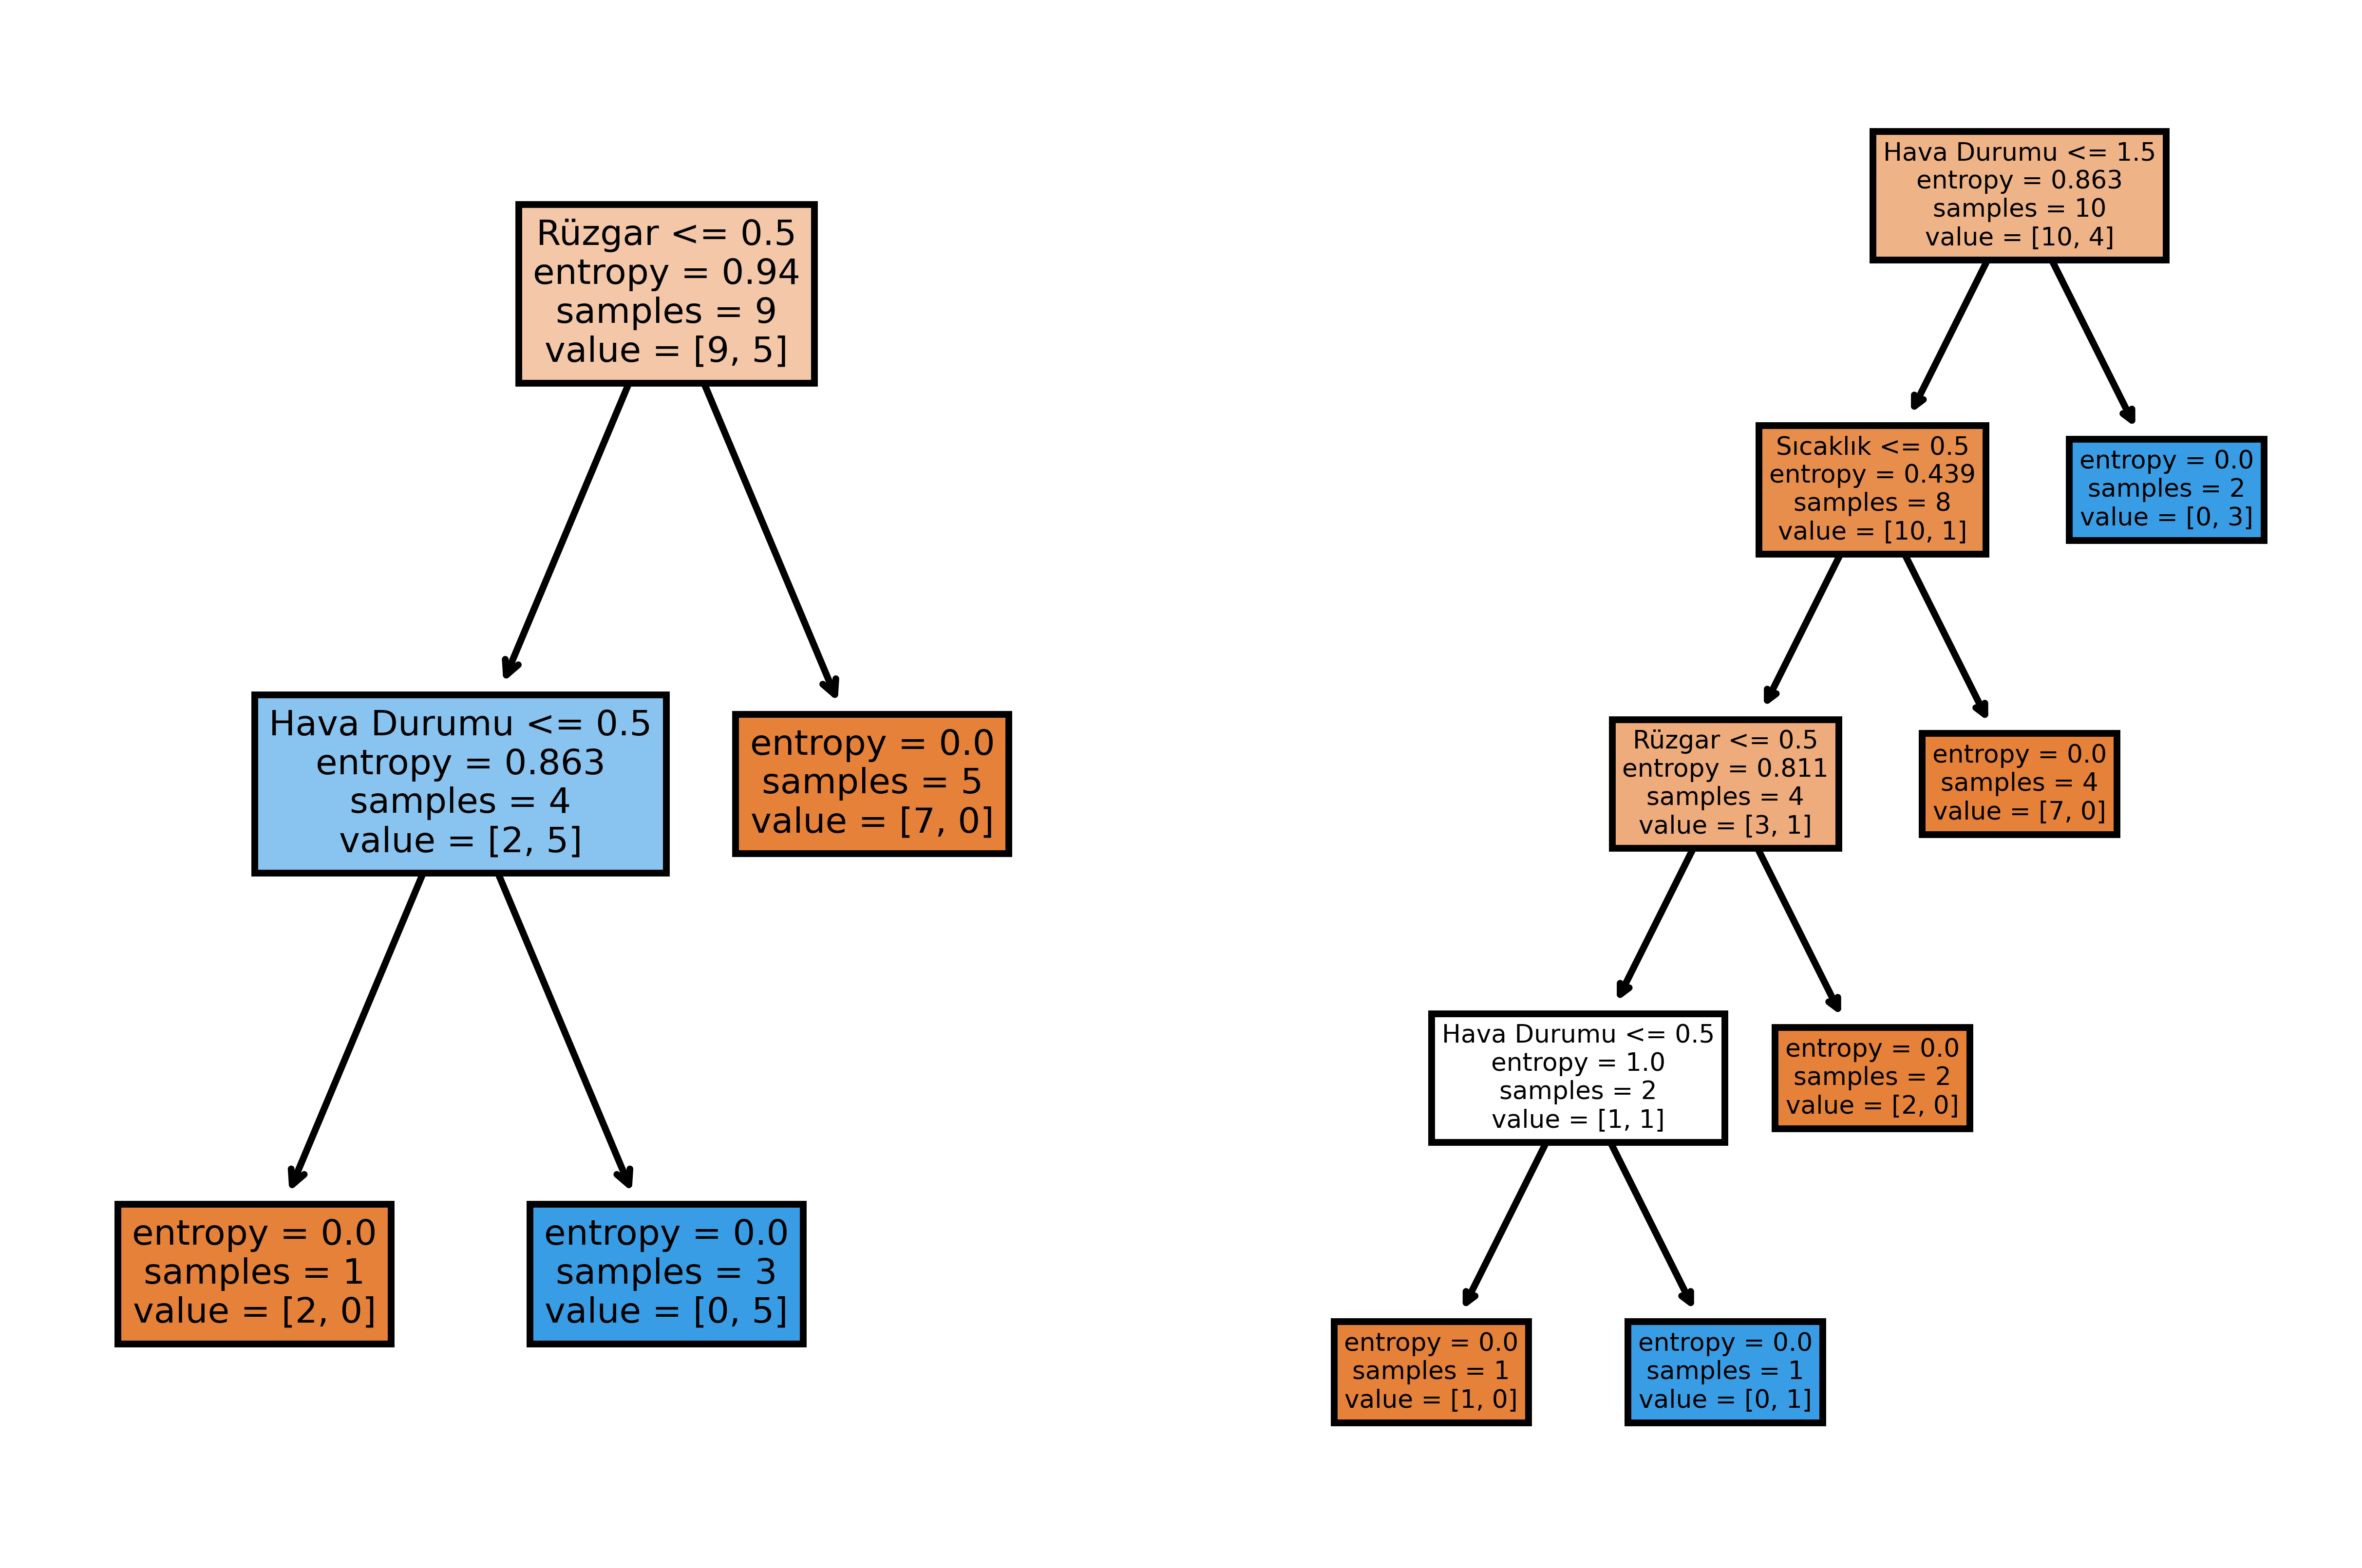

In [87]:
fn=dataset.columns[:4]
fig, axes = plt.subplots(nrows = 1, ncols = len(classifier.estimators_),dpi=1000)

for index in range(0, len(classifier.estimators_)):
    tree.plot_tree(classifier.estimators_[index],
                   feature_names = fn, 
                   filled = True,
                   ax = axes[index]);
    
#fig.savefig('rf_5trees.png')